In [31]:
import pandas as pd

tc = True
file_path_h2=f"h2{'tc' if tc else ''}.csv"
file_path_h3=f"h3{'tc' if tc else ''}.csv"

# Correctly loading the CSV files using ';' as the separator
data_h2 = pd.read_csv(file_path_h2, sep=';')
data_h3 = pd.read_csv(file_path_h3, sep=';')

# Counting the number of response codes different than 200 in both datasets
count_non_200_h2 = data_h2[data_h2['response_code'] != 200].shape[0]
count_non_200_h3 = data_h3[data_h3['response_code'] != 200].shape[0]

# Counting how many times the protocol was different than 3 in h3.csv
count_protocol_not_3_h3 = data_h3[data_h3['http_version'] != 3].shape[0]

# Excluding records with response code different than 200 and protocol not 3 in h3 from mean calculation
filtered_data_h2 = data_h2[data_h2['response_code'] == 200]
filtered_data_h3 = data_h3[(data_h3['response_code'] == 200) & (data_h3['http_version'] == 3)]

# Calculating new mean values
new_mean_values_h2 = filtered_data_h2.mean()
new_mean_values_h3 = filtered_data_h3.mean()

# Preparing data for comparison
comparison_new_mean_values = pd.DataFrame({'H2 Mean Values (Filtered)': new_mean_values_h2, 'H3 Mean Values (Filtered)': new_mean_values_h3})

print("Bad response H2: ", count_non_200_h2);
print("Bad response H3: ", count_non_200_h3);
print("Bad protocol H3: ", count_protocol_not_3_h3);
comparison_new_mean_values


Bad response H2:  0
Bad response H3:  0
Bad protocol H3:  14


,H2 Mean Values (Filtered),H3 Mean Values (Filtered)
response_code,200.000000,200.000000
http_version,2.000000,3.000000
speed_download,0.860000,1.348837
speed_upload,0.000000,0.000000
time_starttransfer,3.328953,2.765018
time_pretransfer,2.789890,2.176680
time_appconnect,2.789801,2.172980
time_total,3.329160,2.767546
time_connect,1.523905,1.460025
size_download,4.000000,4.000000


# Bar chart

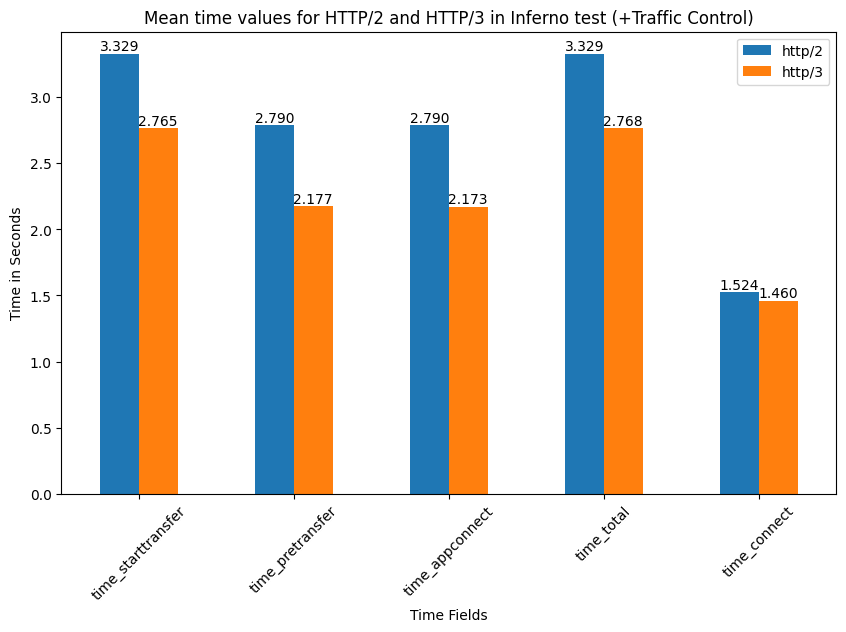

In [32]:
import matplotlib.pyplot as plt

# Extracting time related fields for both datasets
time_fields = ['time_starttransfer', 'time_pretransfer', 'time_appconnect', 'time_total', 'time_connect']

# Extracting these fields from both datasets
h2_times = filtered_data_h2[time_fields]
h3_times = filtered_data_h3[time_fields]

# Simplifying the approach to plot aggregated mean values of time fields for both h2 and h3 datasets

# Calculating mean values of time fields for both datasets
mean_times_h2 = h2_times.mean()
mean_times_h3 = h3_times.mean()

# Creating a new DataFrame for plotting
mean_times_df = pd.DataFrame({'http/2': mean_times_h2, 'http/3': mean_times_h3})

# Adding exact mean values above the bars in the chart

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
mean_times_df.plot(kind='bar', ax=ax)
plt.xlabel('Time Fields')
plt.ylabel('Time in Seconds')
plt.title(f'Mean time values for HTTP/2 and HTTP/3 in Inferno test{" (+Traffic Control)" if tc else ""}')
plt.xticks(rotation=45)

# Adding mean values above the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f', label_type='edge')

plt.show()

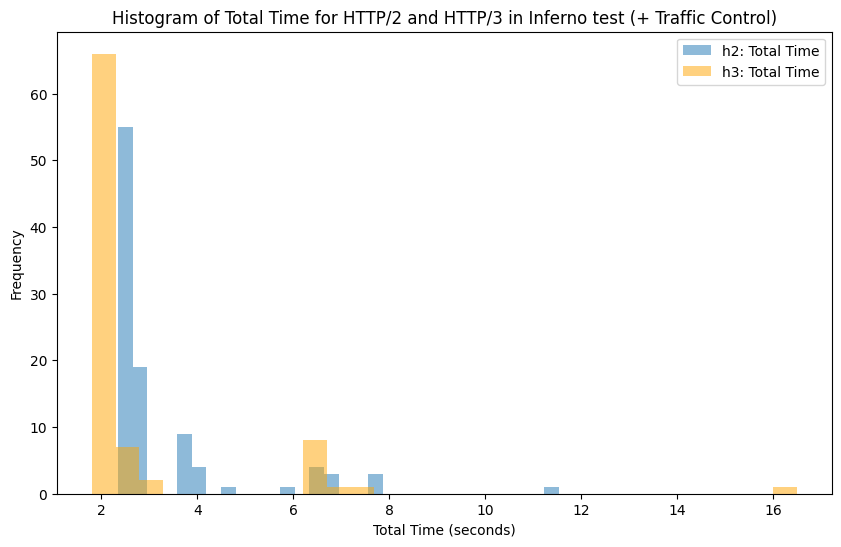

In [33]:
# Creating a histogram to compare the 'time_total' for both h2 and h3 datasets

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for h2 data
ax.hist(filtered_data_h2['time_total'], bins=30, alpha=0.5, label='h2: Total Time')

# Histogram for h3 data
ax.hist(filtered_data_h3['time_total'], bins=30, alpha=0.5, label='h3: Total Time', color='orange')

ax.set_title(f'Histogram of Total Time for HTTP/2 and HTTP/3 in Inferno test{" (+ Traffic Control)" if tc else ""}')
ax.set_xlabel('Total Time (seconds)')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()
